# Prediction using Supervised ML
#
# Author: Khushi Bhatnagar

#Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just 2 variables.

In [31]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading the Data from link

In [32]:
dataset = pd.read_csv("http://bit.ly/w-data")


In [33]:
#the first five values in the dataset
dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


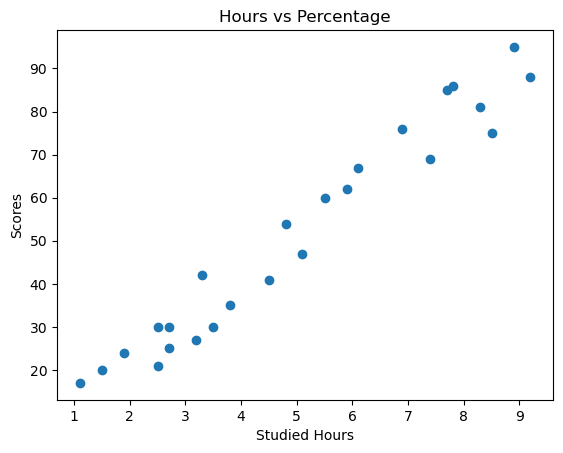

In [35]:
#Hours Vs Percentage of Scores
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()


Splitting data into feature and target

In [36]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = dataset.iloc[:, :-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [37]:
Y = dataset.iloc[:, -1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Training the Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Building model

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

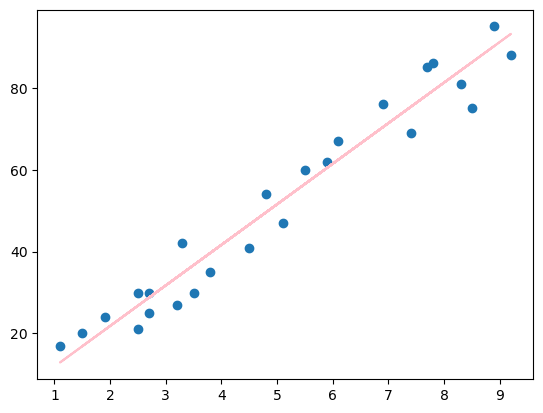

In [40]:
# Plotting the regression line and test data
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line,color = 'pink')
plt.show()


#Predicting the Test set results

In [41]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#Visualising the Training set results


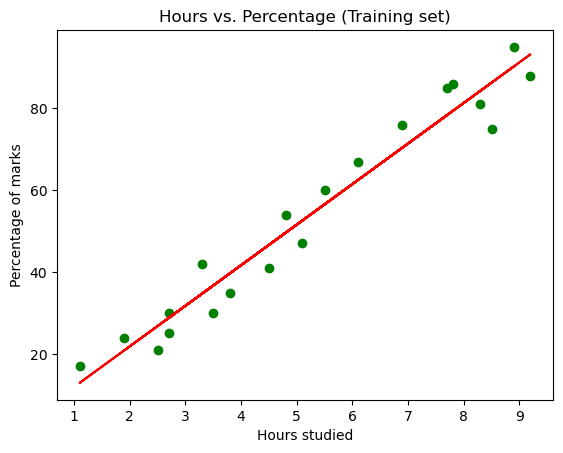

In [42]:
plt.scatter(X_train, Y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

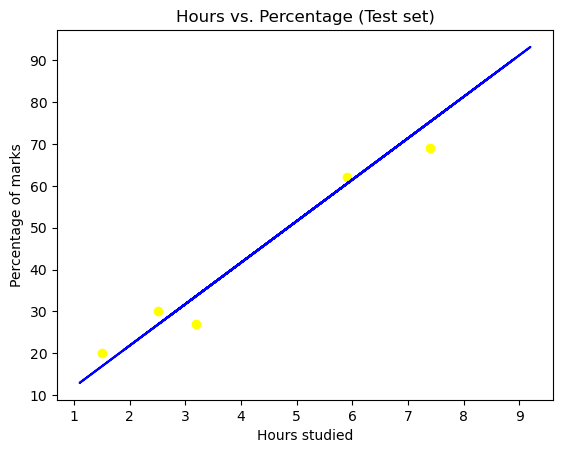

In [43]:
#Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

Comparing the actual values with the predicted ones.

In [44]:
dataset = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
dataset

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Pridicting score

In [45]:
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.69173249].


Errors

In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


In [47]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(Y_test,Y_pred))

The R-Square of the model is:  0.9454906892105356


# CONCLUSION
If the student studies for 9.25 hours/day, the score is [93.69173249].